In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import OPTICS
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [3]:
df.shape

(1485, 12)

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
df = convert(df, 2,12)
df_cluster = df.iloc[:,0:11]
df_cluster.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,67.0,38.11,0,2,1,1,2,0,2,0,1
1,29.0,0.00,1,2,2,2,2,2,2,2,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1
4,21.0,0.00,1,2,2,2,2,2,2,2,1


In [6]:
#OPTIC CLUSTERING with visualization

def optic_clustering(df,n,k):
    """Function to perform kmeans
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): min number of point to form a cluster
        k(integer): Parameter for PCA
    """
    
    optics = OPTICS(min_samples = n).fit(df)

    
    pca = PCA(n_components=k)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]
    
    df['cluster'] = optics.labels_
    
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    return df,plot

array([-1,  3,  2,  1,  4,  0])

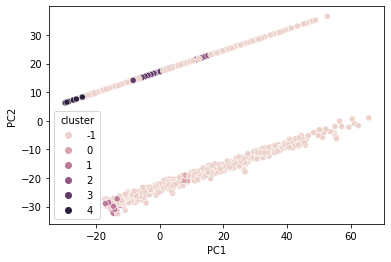

In [7]:
df_cluster_1, plot = optic_clustering(df_cluster,26,2)
df_cluster_1.head()
df_cluster_1.cluster.unique()